In [21]:
import numpy as np
from matplotlib import pyplot as pt
from scipy.integrate import odeint

### Solve numerically the following equation using the Euler method: 
$$ {dN \over dt} = {rN \left (1-{N \over K} \right )} $$
### To $$ K, r, N(t=0) = N0. $$

### The above equation solves to:
$$ N = N0 + \Delta T rN(1-N/K) $$

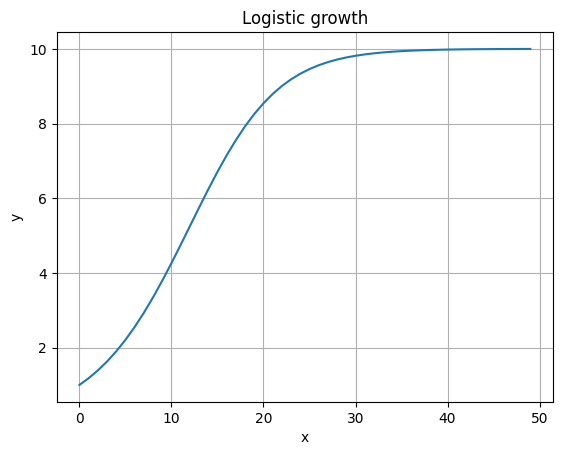

In [72]:
def logi(r, K, N, deltaT, tm):
    results = [N]
    n = int(tm/deltaT)
    for i in range(1,n):
        results.append(N+deltaT*r*N*(1-(N/K)))
        N = results[i]
    return np.array(results)
solution = logi(2, 10, 1, 0.1, 5)

n = []
for i in range(0,len(solution)):
    n.append(i)
    i += 1

pt.plot(n, solution)
pt.xlabel("x")
pt.ylabel("y")
pt.title("Logistic growth")
pt.grid()

In [71]:
def logi(r, K, N, deltaT, tm):
    results = [N]
    n = int(tm/deltaT)
    for i in range(1,n):
        results.append(N+deltaT*r*N*(1-(N/K)))
        print(f"{N}+{deltaT}*{r}*{N}*{(1-(N/K))} = {results[i]}")
        print("--"*20)
        N = results[i]
logi(1, 10, 1, 0.1, 5)

1+0.1*1*1*0.9 = 1.09
----------------------------------------
1.09+0.1*1*1.09*0.891 = 1.187119
----------------------------------------
1.187119+0.1*1*1.187119*0.8812881 = 1.29173838479839
----------------------------------------
1.29173838479839+0.1*1*1.29173838479839*0.870826161520161 = 1.4042263427306136
----------------------------------------
1.4042263427306136+0.1*1*1.4042263427306136*0.8595773657269387 = 1.524930460787489
----------------------------------------
1.524930460787489+0.1*1*1.524930460787489*0.8475069539212511 = 1.6541693777638624
----------------------------------------
1.6541693777638624+0.1*1*1.6541693777638624*0.8345830622236138 = 1.7922235522369319
----------------------------------------
1.7922235522369319+0.1*1*1.7922235522369319*0.8207776447763069 = 1.9393252548486974
----------------------------------------
1.9393252548486974+0.1*1*1.9393252548486974*0.8060674745151303 = 2.0956479558926278
----------------------------------------
2.0956479558926278+0.1*1*2.0

Text(0, 0.5, 'x')

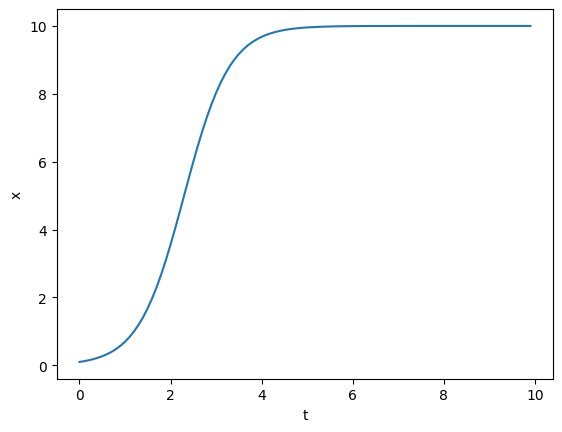

In [70]:
## This can also be solve using a optimized Runge-Kutta method with odeint()

# Setting the parameters
ts = np.arange(0,10.,0.1)
r=2.
K=10.
N=0.1

# Creating the function
def logi(x,ts,r,k):
    return r*x*(1-(x/K))

# Passing all arguments to odeint(). Note that the order of the parameters needs to be the same as defined
# in the function above (here, x = N).
x = odeint(logi,N,ts,(r,K))

pt.plot(ts, x)
pt.xlabel('t')
pt.ylabel('x')

# The diffusion equation

The diffusion equation describes any stuff that diffuses through a medium, in which the diffusion process is inherently a random walk of the individual stuff. For example, heat diffuses in this way, so does a ink fluid when dropped into still water:

\begin{align}
    \frac{\partial \rho}{\partial t} = \alpha \frac{\partial^2 \rho}{\partial x^2}
\end{align}

where $\rho$ is the density of a substance and $\alpha$ is the diffusion coefficient. In order to simulate this equation we must pass from a continuous equation to a discrete equation, since continuous variables is not a computational reality. Thus, our simulation is taken in timesteps of size $\Delta t$, where the step in time must not be larger than

\begin{align}
    \Delta t \leq \frac{\left( \Delta x \right)^2}{2 \alpha}
\end{align}

The second derivative (right side of the equation) is written

\begin{align}
    \frac{\partial^2 \rho}{\partial x^2} \rightarrow \frac{\rho_{i+1} - 2\rho_{i} + \rho_{i-1}}{\Delta x^2}
\end{align}

Thus, the final equation in discrete time and space is

\begin{align}
    \frac{\rho_i^{t+1} - \rho_i^t}{\Delta t} = \alpha \frac{\rho_{i+1}^t - 2\rho_{i}^t + \rho_{i-1}^t}{\Delta x^2} = \alpha \left[ -\frac{\left( \rho_i^t - \rho_{i-1}^t \right)}{\Delta x^2} - \frac{\left( \rho_{i+1}^t - \rho_{i}^t \right)}{\Delta x^2} \right]
\end{align}

We then compute the density $\rho_{i}^{t+1}$ (the final formulae) simply by

\begin{align}
    \rho_i^{t+1} = \rho_i^t + \alpha \Delta t \left[ -\frac{\left( \rho_i^t - \rho_{i-1}^t \right)}{\Delta x^2} - \frac{\left( \rho_{i+1}^t - \rho_{i}^t \right)}{\Delta x^2} \right]
\end{align}

In [25]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
import seaborn as sns

In [63]:
def diffusion_eq(steps, alpha, deltaX, deltaT, time_steps, plot_space, P0):
    diffs = [P0]
    alphaDelta_dPdt = np.empty(steps)
    for i in range(len(time_steps)):
        for j in range(1,steps-1):
            alphaDelta_dPdt[j] = alpha * deltaT * (-(P0[j]-P0[j-1])/deltaX**2 + (P0[j+1]-P0[j])/deltaX**2)
        alphaDelta_dPdt[0] = alphaDelta_dPdt[1]
        alphaDelta_dPdt[steps-1] = alphaDelta_dPdt[steps-2]
        P0 = P0 + alphaDelta_dPdt
        diffs.append(P0)
    for i in range(len(diffs)):
        plt.plot(plot_space, diffs[i], color = sns.color_palette('viridis', len(diffs))[i])

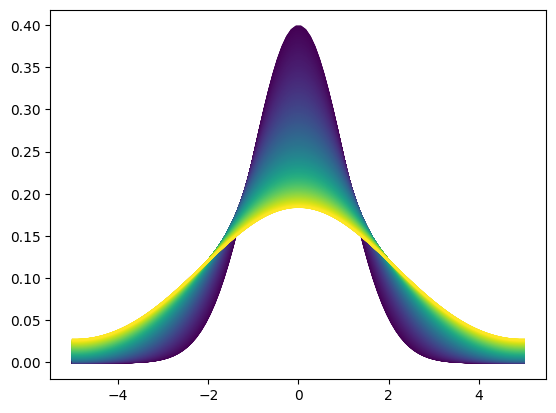

In [64]:
steps = 100
alpha = 1e-2
deltaX = 10/steps
deltaT = deltaX**2/(8*alpha)
time_steps = np.arange(0,180,deltaT)
plot_space = np.linspace(-5, 5, steps)
P0 = st.norm.pdf(plot_space, 0, 1)

diffusion_eq(steps, alpha, deltaX, deltaT, time_steps, plot_space, P0)

## Now, lets put together the logistic growth and the diffusion equations in order to simulate the bacterial behavior


In [84]:
def diffLogi_eq(steps, alpha, deltaX, deltaT, time_steps, plot_space, P0, r, K):
    diffs = [P0]
    alphaDelta_dPdt = [None] * steps
    logi_growth = [None] * steps
    for i in range(len(time_steps)):
        for j in range(1,steps-1):
            alphaDelta_dPdt[j] = alpha * deltaT * (-(P0[j]-P0[j-1])/deltaX**2 + (P0[j+1]-P0[j])/deltaX**2)
            logi_growth[j] = deltaT*r*P0[j]*(1-(P0[j]/K))
            
        alphaDelta_dPdt[0] = alphaDelta_dPdt[1]
        alphaDelta_dPdt[steps-1] = alphaDelta_dPdt[steps-2]
        logi_growth[0] = logi_growth[1]
        logi_growth[steps-1] = logi_growth[steps-2]
        
        P0 = P0 + alphaDelta_dPdt + logi_growth
        #P0 = P0 + alphaDelta_dPdt
        diffs.append(P0)
    for i in range(len(diffs)):
        plt.plot(plot_space, diffs[i], color = sns.color_palette('viridis', len(diffs))[i])
    return np.array(diffs)

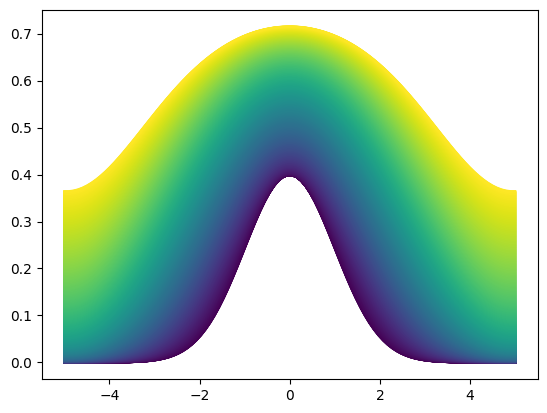

In [85]:
steps = 100
alpha = 1e-2
deltaX = 10/steps
deltaT = deltaX**2/(8*alpha)
time_steps = np.arange(0,180,deltaT)
plot_space = np.linspace(-5, 5, steps)
P0 = st.norm.pdf(plot_space, 0, 1)
r = 0.02
K = 0.8

diff = diffLogi_eq(steps, alpha, deltaX, deltaT, time_steps, plot_space, P0, r, K)

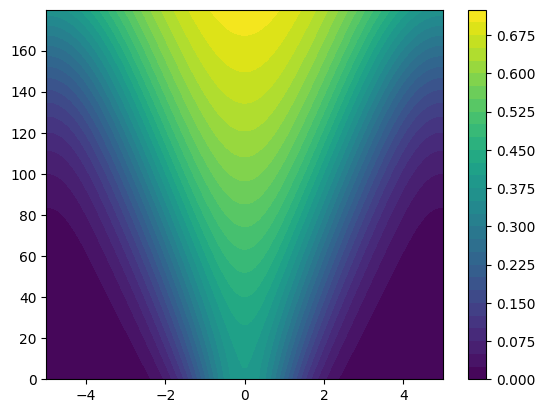

In [95]:
X, Y = np.meshgrid(plot_space, time_steps)
plt.contourf(X, Y, diff[1:], levels = 30)
plt.colorbar()